# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

**What are you being asked to do? What metric should I use to evaluate the success of my business/organizational objective?**
* The goal during this phase of the project is to develop a Random Forest model to aid in the detection of whether a video contains a claim or an opinion. If the model classifies a video as containing a claim, it will be sent to a human moderator to evaluate if this is true or not. 

**What are the ethical implications of the model? What are the consequences of your model making errors?**

What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?
* If the model predicts a false negative and incorrectly classifies a video as not containing a claim when it actually does, this means that the video, which likely contains content that violates terms of service, will now be viewed and shared among many users and, although it cannot be immediately quantified, can have a significant negative impact.

What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?
* If the model predicts a false positive and incorrectly classifies a video as containing a claim when it actually doesn't, this means the video would then be sent to a human moderator for review. The negative impact of this is minimal.

**How would you proceed?**
* I would proceed with the development of the model, as even if it doesn't have the highest success rate in accurately predicting whether a video contains a claim or not and presents a higher rate of false positives, the detrimental impacts of it are minimal but the positives are significant.

**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model test workflow, broken into the following steps:

1. Split the data into train/test/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [68]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis
from scipy import stats

# Import packages for data preprocessing and model selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

# Import XGBoost classifier
from xgboost import XGBClassifier

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [69]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [70]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [71]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [72]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [73]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [74]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [75]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [76]:
# Drop rows with missing values
data = data.dropna()

In [77]:
# Check for missing values after handling missing values
data.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

Check for and handle duplicates.

In [78]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

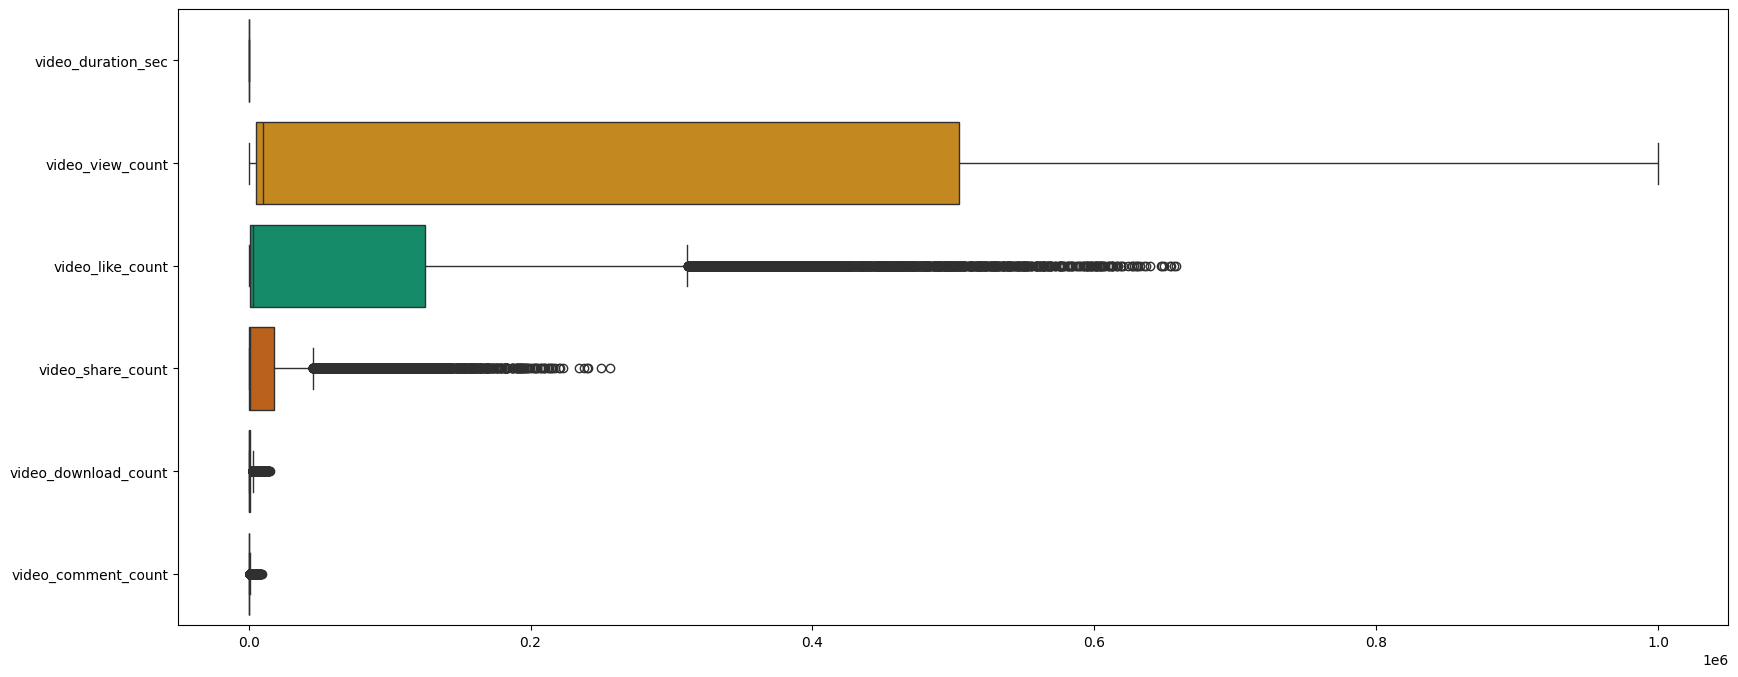

In [79]:
# Check for outliers using boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(data=data.drop(columns=["video_id","#"]), orient="h", palette="colorblind")
plt.show()

In [80]:
columns = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count']
threshold = 3

for column in columns:
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    print(f"Number of outliers in {column}: {outliers.shape[0]}")

Number of outliers in video_duration_sec: 0
Number of outliers in video_view_count: 0
Number of outliers in video_like_count: 397
Number of outliers in video_share_count: 537
Number of outliers in video_download_count: 516
Number of outliers in video_comment_count: 486


Many of the numerical variables contain a significant number of outliers. These were visualized using boxplots and by calculating the Z-score for each data point with a threshold of ±3, which is commonly used for normally distributed data. Although many of these variables are not normally distributed, this process was followed for educational purposes.

Check class balance.

In [81]:
# Check class balance for the target variable
columns = ['claim_status','verified_status']

for column in columns:
    print("\n",data[column].value_counts(normalize=True))


 claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

 verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64


The 'claim_status' variable shows minimal imbalance, whereas the 'verified_status' variable exhibits significant imbalance. This issue will need to be addressed, potentially through methods like upsampling the minority class.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [82]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data["video_text_length"] = data['video_transcription_text'].apply(lambda x: len(x))

Calculate the average text_length for claims and opinions.

In [83]:
# Calculate the average text_length for claims and opinions
data.groupby("claim_status")['video_text_length'].mean()

claim_status
claim      95.376978
opinion    82.722562
Name: video_text_length, dtype: float64

Visualize the distribution of `text_length` for claims and opinions.

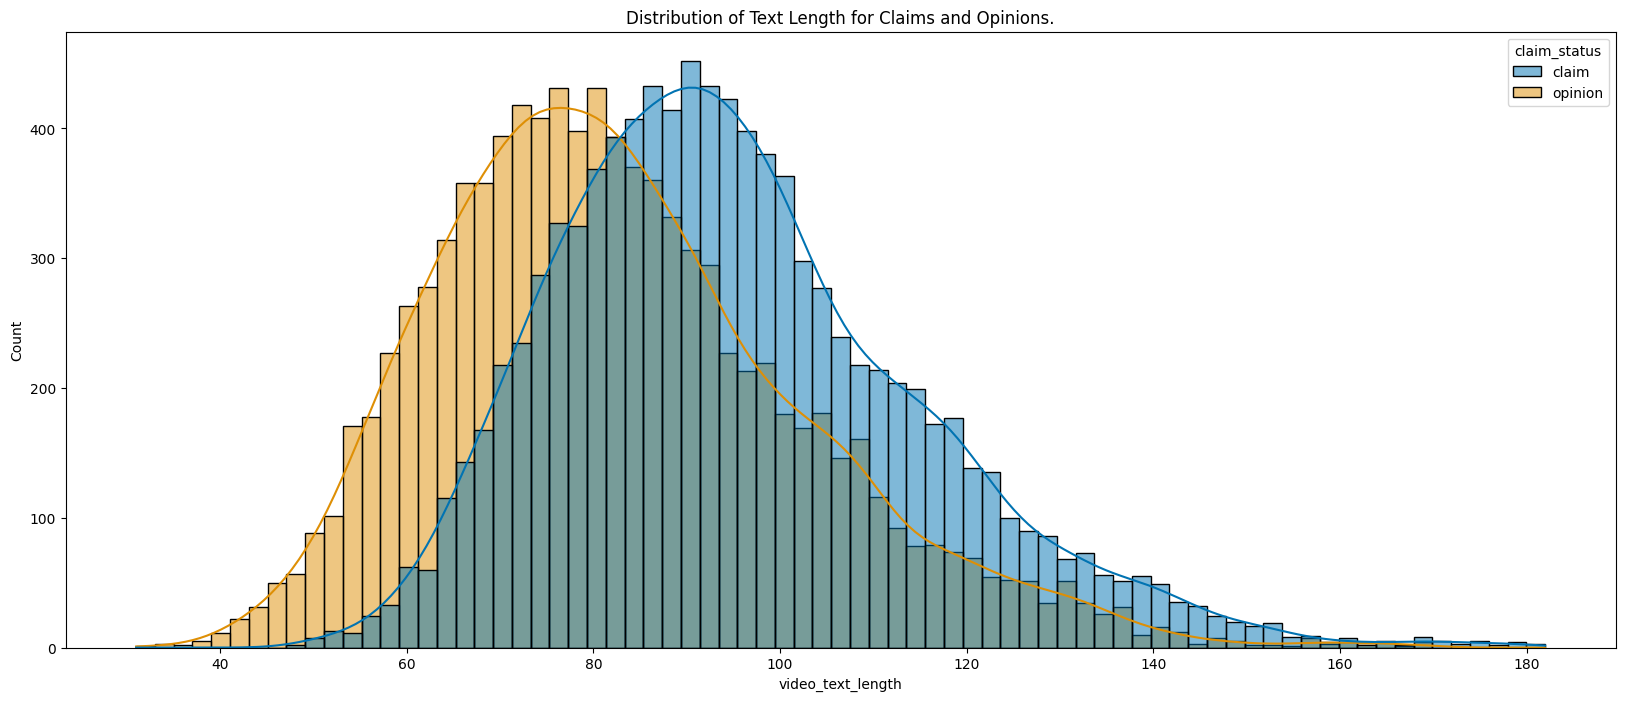

In [84]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
plt.figure(figsize=(20,8))
sns.histplot(data=data, x='video_text_length', hue='claim_status', bins=75, kde=True, palette="colorblind")
plt.title("Distribution of Text Length for Claims and Opinions.")
plt.show()

On average, videos categorized as claims appear to have longer text lengths than those categorized as opinions. Further investigation is needed, but this newly engineered variable may hold significant predictive value.

**Feature selection and transformation**

Encode target and categorical variables.

In [85]:
# Create a copy of the data
X = data.copy()

# Drop unnecessary columns
X = X.drop(columns=['#', 'video_id'])

# Encode target variable
X['claim_status'] = X['claim_status'].map({'claim': 1, 'opinion': 0})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True, dtype=int)

# View the data
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


### **Task 4: Split the data**

Assign target variable.

In [86]:
# Isolate target variable
y = X['claim_status']

# Display the first few rows
y.head()

0    1
1    1
2    1
3    1
4    1
Name: claim_status, dtype: int64

Isolate the features.

In [87]:
# Isolate features
features = X.drop(columns=['claim_status'])

# Display first few rows of features dataframe
features.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [88]:
# Split the data into training and testing sets
X_train_data, X_test, y_train_data, y_test = train_test_split(features, y, test_size = 0.20, random_state = 42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [89]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size = 0.25, random_state = 42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [90]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

The number of features is consistent between the training and test sets, as is the number of rows between the outcome variable and the validation and test data.

### **Tokenize Text Column**

In [91]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2,3),
                            max_features=15,
                            stop_words='english')

In [92]:
# Extract numerical features from `video_transcription_text` in the training set
training_count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
training_count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
training_count_df = pd.DataFrame(training_count_data, columns=count_vec.get_feature_names_out())
training_count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
# Concatenate `X_train` and `training_count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), training_count_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,55,254459.0,66996.0,2673.0,220.0,95.0,97,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,40,433056.0,85389.0,13301.0,1766.0,1.0,110,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,29,997358.0,83574.0,17310.0,951.0,530.0,155,0,1,0,...,0,1,1,0,0,0,0,0,0,0
3,15,122973.0,53791.0,14407.0,257.0,8.0,89,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17,948.0,309.0,61.0,8.0,2.0,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Extract numerical features from `video_transcription_text` in the validation set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [96]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [97]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,34,761969.0,502599.0,94675.0,3242.0,1763.0,98,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,54,4168.0,965.0,106.0,9.0,2.0,95,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,8347.0,1684.0,134.0,39.0,7.0,84,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,6902.0,2861.0,20.0,27.0,1.0,74,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,37.0,8.0,1.0,0.0,0.0,96,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(test_count_data, columns=count_vec.get_feature_names_out())
test_count_df.head()

,colleague learned,colleague read,discussion board,forum claim,friend learned,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# Concatenate `X_test` and `test_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend read,internet forum,internet forum claim,learned media,media claim,news claim,point view,read media,social media,willing wager
0,22,6517.0,337.0,120.0,5.0,0.0,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,758131.0,41367.0,11288.0,774.0,143.0,83,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17,613559.0,368043.0,113662.0,7130.0,4288.0,76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,363966.0,196481.0,1246.0,1593.0,657.0,114,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,582955.0,86748.0,7182.0,865.0,21.0,98,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X_train_final.shape, X_val_final.shape, X_test_final.shape

((11450, 25), (3817, 25), (3817, 25))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [102]:
# Instantiate the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
param_grid = {'max_depth': [None],
             'max_features': [0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [200],
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy','precision','recall','f1']

# Instantiate the GridSearchCV object
rf_grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scoring, refit='recall')

In [103]:
# Fit the model to the data 
rf_grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [104]:
# Examine best recall score
print(rf_grid_search.best_score_)

# Examine best parameters
print(rf_grid_search.best_params_)

0.9955157537710868
{'max_depth': None, 'max_features': 0.6, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [105]:
# Access the GridSearch results and convert it to a pandas df
rf_results = pd.DataFrame(rf_grid_search.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
print("Mean Precision:",rf_results['mean_test_precision'][rf_grid_search.best_index_])
print("Mean Recall:", rf_results['mean_test_recall'][rf_grid_search.best_index_])
print("Mean F1:", rf_results['mean_test_f1'][rf_grid_search.best_index_])
print("Mean Accuracy:", rf_results['mean_test_accuracy'][rf_grid_search.best_index_])

Mean Precision: 1.0
Mean Recall: 0.9955157537710868
Mean F1: 0.9977521354750489
Mean Accuracy: 0.9977292576419213


**Question:** How well is your model performing? Consider average recall score and precision score.

The model overall performs exceptionally well.

* Mean Precision: When the model predicts a video contains a claim, it is correct 99.95% of the time. 
* Mean Recall: The model correctly identifies 99.55% of all actual claims. 
* Mean F1: The harmonic mean of Precision and Recall; the model has a very high overall performance of 99.77%. 
* Mean Accuracy: The model correctly identifies whether a video contains an opinion or a claim 99.77% of the time.

### **Build an XGBoost model**

In [106]:
# Instantiate the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
param_grid = {'max_depth': [4],
             'min_child_weight': [5],
             'learning_rate': [0.1],
             'n_estimators': [300]
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy','precision','recall','f1']

# Instantiate the GridSearchCV object
xgb_grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring=scoring, refit='recall')

In [107]:
# Fit the model to the data
xgb_grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [4],
                         'min_child_weight': [5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [108]:
# Examine best recall score
print(xgb_grid_search.best_score_)

# Examine best parameters
print(xgb_grid_search.best_params_)

0.9896520484365239
{'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 300}


Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [109]:
# Access the GridSearch results and convert it to a pandas df
xgb_results = pd.DataFrame(xgb_grid_search.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index for the XGBoost model
print("Mean Precision:",xgb_results['mean_test_precision'][xgb_grid_search.best_index_])
print("Mean Recall:", xgb_results['mean_test_recall'][xgb_grid_search.best_index_])
print("Mean F1:", xgb_results['mean_test_f1'][xgb_grid_search.best_index_])
print("Mean Accuracy:", xgb_results['mean_test_accuracy'][xgb_grid_search.best_index_])

Mean Precision: 0.9987827492822294
Mean Recall: 0.9896520484365239
Mean F1: 0.9941946635676304
Mean Accuracy: 0.9941484716157205


**Question:** How well does your model perform? Consider recall score and precision score.

The XGB model also performs very well; however, the scores for the Random Forest model are slightly better than the XGB model. The differences in these scores are very small though.

* Mean Precision: When the model predicts a video contains a claim, it is correct 99.87% of the time.
* Mean Recall: The model correctly identifies 98.96% of all actual claims.
* Mean F1: The harmonic mean of Precision and Recall; the model has a very high overall performance of 99.41%.
* Mean Accuracy: The model correctly identifies whether a video contains an opinion or a claim 99.41% of the time.

In [110]:
# Examine the GridSearch results df at column `mean_test_precision` in the best index for the Random Forest model
print("Random Forest Model Scores:")
rf_precision = rf_results['mean_test_precision'][rf_grid_search.best_index_]
rf_recall = rf_results['mean_test_recall'][rf_grid_search.best_index_]
rf_f1 = rf_results['mean_test_f1'][rf_grid_search.best_index_]
rf_accuracy = rf_results['mean_test_accuracy'][rf_grid_search.best_index_]

print("Mean Precision:", rf_precision)
print("Mean Recall:", rf_recall)
print("Mean F1:", rf_f1)
print("Mean Accuracy:", rf_accuracy)

# Examine the GridSearch results df at column `mean_test_precision` in the best index for the XGBoost model
print("\nXGBoost Model Scores:")
xgb_precision = xgb_results['mean_test_precision'][xgb_grid_search.best_index_]
xgb_recall = xgb_results['mean_test_recall'][xgb_grid_search.best_index_]
xgb_f1 = xgb_results['mean_test_f1'][xgb_grid_search.best_index_]
xgb_accuracy = xgb_results['mean_test_accuracy'][xgb_grid_search.best_index_]

print("Mean Precision:", xgb_precision)
print("Mean Recall:", xgb_recall)
print("Mean F1:", xgb_f1)
print("Mean Accuracy:", xgb_accuracy)

# Calculate and print the differences
print("\nDifferences (Random Forest - XGBoost):")
print("Precision Difference:", rf_precision - xgb_precision)
print("Recall Difference:", rf_recall - xgb_recall)
print("F1 Score Difference:", rf_f1 - xgb_f1)
print("Accuracy Difference:", rf_accuracy - xgb_accuracy)

Random Forest Model Scores:
Mean Precision: 1.0
Mean Recall: 0.9955157537710868
Mean F1: 0.9977521354750489
Mean Accuracy: 0.9977292576419213

XGBoost Model Scores:
Mean Precision: 0.9987827492822294
Mean Recall: 0.9896520484365239
Mean F1: 0.9941946635676304
Mean Accuracy: 0.9941484716157205

Differences (Random Forest - XGBoost):
Precision Difference: 0.0012172507177705683
Recall Difference: 0.00586370533456293
F1 Score Difference: 0.003557471907418508
Accuracy Difference: 0.0035807860262008218


<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [111]:
# Use the random forest "best estimator" model to get predictions on the validation set
rf_val_predictions = rf_grid_search.best_estimator_.predict(X_val_final)

Display the predictions on the validation set.

In [112]:
# Display the predictions on the validation set
rf_val_predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

Display the true labels of the validation set.

In [113]:
# Display the true labels of the validation set
y_val.values

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

Create a confusion matrix to visualize the results of the classification model.

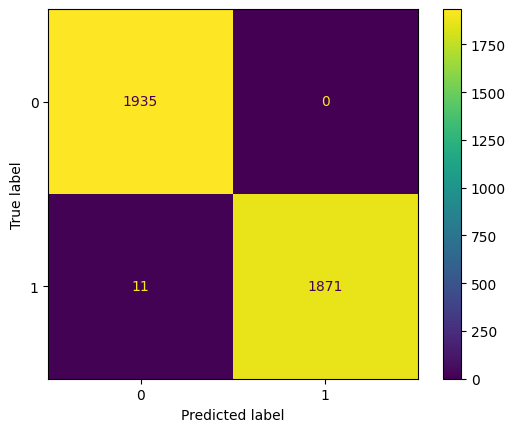

In [114]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
rf_conf_matrix = confusion_matrix(y_val, rf_val_predictions)

# Create display of confusion matrix using ConfusionMatrixDisplay()
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_grid_search.best_estimator_.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [115]:
# Create a classification report
# Create classification report for random forest model
rf_classification_report = classification_report(y_val, rf_val_predictions, digits = 4)
print(rf_classification_report)

              precision    recall  f1-score   support

           0     0.9943    1.0000    0.9972      1935
           1     1.0000    0.9942    0.9971      1882

    accuracy                         0.9971      3817
   macro avg     0.9972    0.9971    0.9971      3817
weighted avg     0.9971    0.9971    0.9971      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [116]:
# Use the best estimator to predict on the validation data
xgb_val_predictions = xgb_grid_search.best_estimator_.predict(X_val_final)

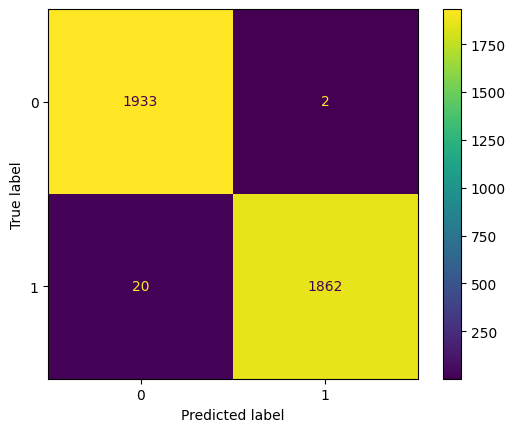

In [117]:
# Compute values for confusion matrix
xgb_conf_matrix = confusion_matrix(y_val, xgb_val_predictions)

# Create display of confusion matrix using ConfusionMatrixDisplay()
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix, display_labels=xgb_grid_search.best_estimator_.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

In [118]:
# Create a classification report
xbg_classification_report = classification_report(y_val, xgb_val_predictions, digits=4)
print(xbg_classification_report)

              precision    recall  f1-score   support

           0     0.9898    0.9990    0.9943      1935
           1     0.9989    0.9894    0.9941      1882

    accuracy                         0.9942      3817
   macro avg     0.9943    0.9942    0.9942      3817
weighted avg     0.9943    0.9942    0.9942      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The Random Forest model slightly outperforms the XGB model. Given the narrow difference between the two, either model could be used moving forward. However, the XGB model has slightly more false negatives, which is counterintuitive to the goal of the model, to predict claims.

### **Use champion model to predict on test data**

In [119]:
y_pred = rf_grid_search.best_estimator_.predict(X_test_final)

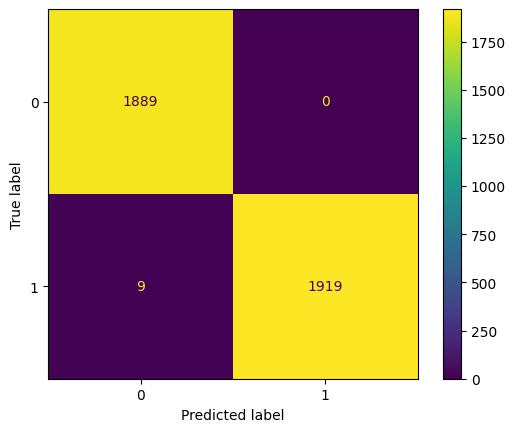

In [120]:
# Compute values for confusion matrix
final_conf_matrix = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix using ConfusionMatrixDisplay()
disp = ConfusionMatrixDisplay(confusion_matrix=final_conf_matrix, display_labels=rf_grid_search.best_estimator_.classes_)

# Plot confusion matrix
disp.plot()

# Display plot
plt.show()

In [121]:
# Create a classification report
final_classification_report = classification_report(y_test, y_pred, digits=4)
print(final_classification_report)

              precision    recall  f1-score   support

           0     0.9953    1.0000    0.9976      1889
           1     1.0000    0.9953    0.9977      1928

    accuracy                         0.9976      3817
   macro avg     0.9976    0.9977    0.9976      3817
weighted avg     0.9977    0.9976    0.9976      3817



#### **Feature importances of champion model**


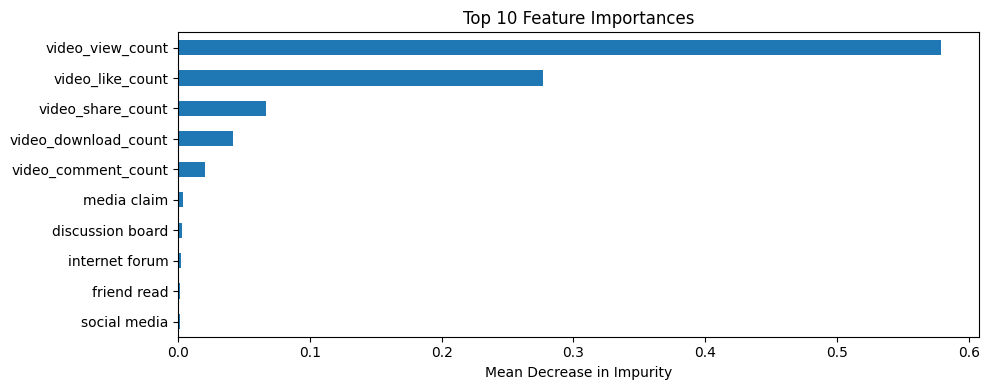

In [122]:
# Plot the top 10 feature importances horizontally.
importances = rf_grid_search.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

# Sort the feature importances and select the top 10
rf_importances = rf_importances.sort_values(ascending=True).tail(10)

fig, ax = plt.subplots(figsize=(10, 4))
rf_importances.plot.barh(ax=ax)
ax.set_title("Top 10 Feature Importances")
ax.set_xlabel("Mean Decrease in Impurity")
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features were 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', and 'video_comment_count.' This is not surprising, as in prior phases of the project, it was determined that the video stats were highly correlated with a video containing a claim. This was due to the nature of the content being a claim, which often results in far more engagement from viewers, who are then far more likely to like and share these videos.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


1. I would recommend using this model, as its performance is considerable. The precision and F1 scores are very high, indicating that the model does an exemplary job of accurately predicting if a video contains a claim. Additionally, the model performed equally well on both the validation and test holdout data.
2. Unsurprisingly, the most predictive features were related to video engagement metrics, such as views, likes, downloads, and so forth. It classified a video as a claim or opinion based on these metrics.
3. The model itself performs nearly perfectly; engineering new variables is unlikely to produce a significant improvement over the current model.
4. Additional information about the video could be useful, such as the number of times the video was reported or even the geographical region where the videos were created.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.